In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
pd.concat([df.head(), df.tail()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Know the data
Let us first look at what information the dataset contains. One thing to note is, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset has the following features (columns):

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration, 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure ( mm⋅Hg )
* SkinThickness: Triceps skin fold thickness ( mm )
* Insulin: 2-Hour serum insulin ( mu⋅$\frac{U}{ml}$ )
* BMI: Body mass index (weight in  kg  / height in  m^2 )
* DiabetesPedigreeFunction: Diabetes pedigree function (indicates the function which scores likelihood of diabetes based on family history)
* Age: Age (in years)
* Outcome: Whether patient is diagnosed with Diabetes (0 for No, 1 for Yes)
* Outcome is our target variable .

# EDA

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The dataset says the minimum values for the features 'Blood Pressure', 'Glucose', 'Blood Pressure', 'skin Thickness', 'Insulin', 'BMI' are 0 (zero), which is not making sense.
- Since we have only 768 observations we cannot remove them so instead we replace them with th mean or median value of the feature.

In [7]:
print(df[df['Glucose']==0].shape)
print(df[df['BloodPressure']==0].shape)
print(df[df['SkinThickness']==0].shape)
print(df[df['Insulin']==0].shape)
print(df[df['BMI']==0].shape)

(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)


In [8]:
df['Glucose'].replace(to_replace = 0, value = df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].mean(), inplace=True)
df['Insulin'].replace(to_replace = 0, value = df['Insulin'].mean(), inplace=True)
df['BMI'].replace(to_replace = 0, value = df['BMI'].mean(), inplace=True)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.info()  # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
# Target Variabel analysis
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

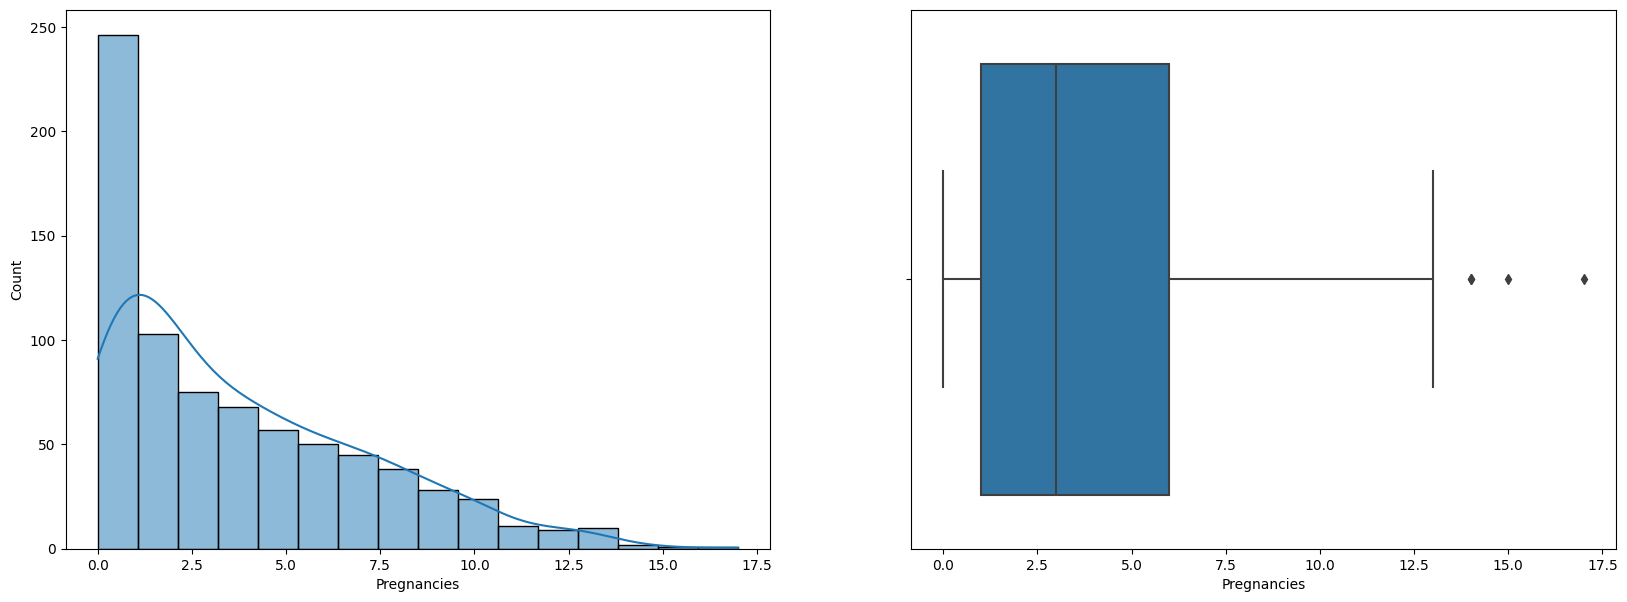

In [12]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0])
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1])

plt.show()

Pregnencies data is more right skewed

In [13]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [14]:
y=df["Pregnancies"].value_counts()

From the above analysis we observe that:

- Most of the patients had 0, 1 or 2 pregnancies.
- Median value of Pregnancies is 3.
- Patients had upto 17 pregnancies!
- There are 3 extreme points in the boxplot (they are not outliers they are the rare cases of pregnancies more than 15).



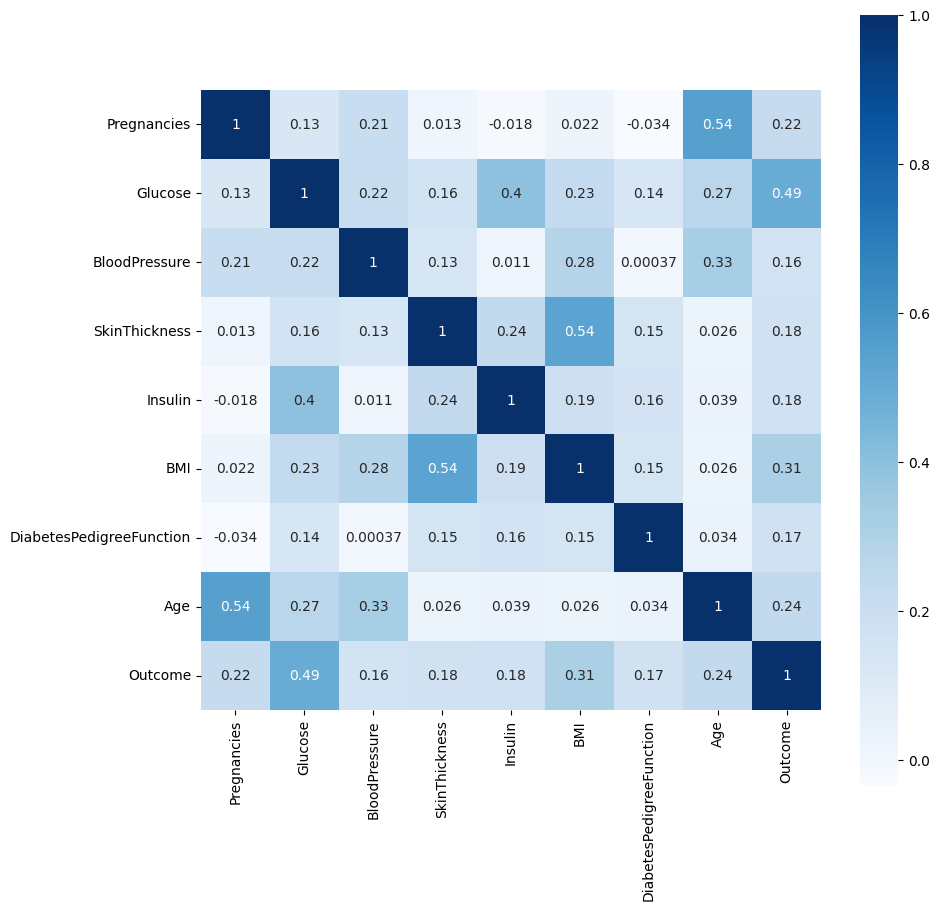

In [15]:
corr = df.corr()
cmap = sns.color_palette("Blues", as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=None, cmap=cmap, square=True, annot=True)
plt.show()

- Age and Pregnancies are positively correlated
- Skin Thickness and BMI are positively correlated
- Glucose and BMI are highly positively correlated with the Outcome variable

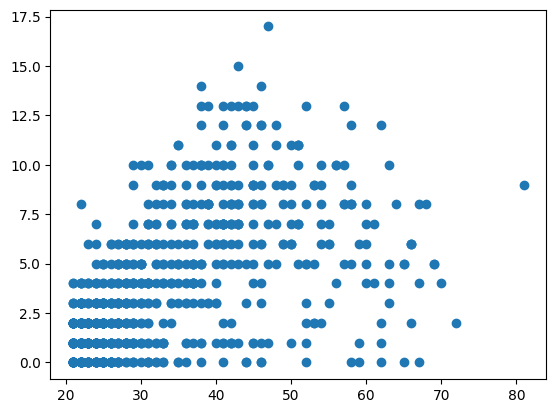

In [16]:
plt.scatter(x=df['Age'],y= df['Pregnancies'])
plt.show()

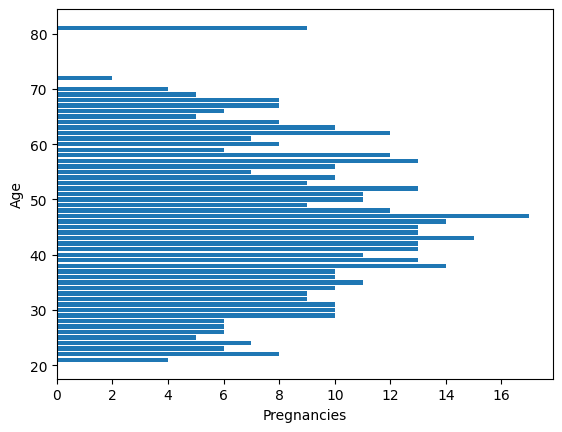

In [17]:
plt.barh(y=df['Age'],width= df['Pregnancies'])
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()

Pragnancies count is increasing from age 21(4) to 47(17) and then started decresing from age 47.

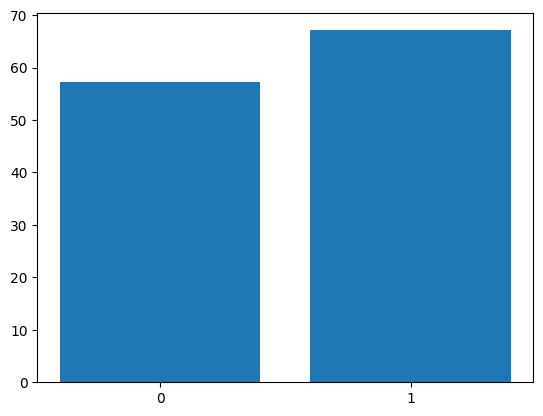

In [18]:
plt.bar(x=df['Outcome'],height= df['BMI'])
plt.xticks([0,1])
plt.show()

People having BMI above 60 are having high chances to be diabetic than to be non-diabetic 

# Data Processing

## Scaling the features
As the ranges of features vary too much so scaling has to be done.
### WHY?
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.

In [19]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [20]:
from sklearn.preprocessing import MinMaxScaler
stdscaler = MinMaxScaler()   #Xsc=X−XminXmax−Xmin.
data = stdscaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
X_train,X_test,Y_train,Y_test = train_test_split(data,Y,test_size=0.2, stratify = Y)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train,Y_train)

LogisticRegression()

In [23]:
# Prediction
predictions = logisticReg.predict(X_test)
score = logisticReg.score(X_test,Y_test)
print("Accuracy on test data: ", score*100,"%")

print("Precision :", precision_score(Y_test, predictions, average='macro'))
print("Recall :", recall_score(Y_test, predictions, average='macro'))
print("F1 Score :", f1_score(Y_test, predictions, average='macro'))

Accuracy on test data:  81.16883116883116 %
Precision : 0.8052587471192122
Recall : 0.7698148148148148
F1 Score : 0.7817950847706063


In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



#### Precision:
-          $\frac{TP}{TP+FP}$
          -> What proportion of positive identifications was actually correct?
- precision 0.5 it means when a tumor is malignant, it is correct 50% of the time.
- Here precision for class 1 is 0.75 so when our logistic Regression says a person diabetic then it is 75% correct.

#### Recall:
-         $\frac{TP}{TP+FN}$
          -> What proportion of actual positives was identified correctly?
- if model has recall 0.11 - it means model correctly identifies 11% of all malignant tumors.
- Here Recall for class 1 is 0.56 which means model correctly identifies 56% of all diabetic cases

## KNN

In [25]:
#Training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
# Prediction
prediction = knn.predict(X_test)
score = knn.score(X_test,Y_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       100
           1       0.69      0.37      0.48        54

    accuracy                           0.72       154
   macro avg       0.71      0.64      0.65       154
weighted avg       0.71      0.72      0.69       154



## Naive Bayes

In [27]:
# Training
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(X_train, Y_train)

In [28]:
# Prediction
prediction = GNBclf.predict(X_test)
score = GNBclf.score(X_test,Y_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## SVM

In [29]:
# Training
from sklearn import svm
clfr = svm.SVC()
clfr.fit(X_train,Y_train)

SVC()

In [30]:
# Prediction
prediction = clfr.predict(X_test)
score = clfr.score(X_test,Y_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



## Decision Trees

In [31]:
# Training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
# Prediction
prediction = dt.predict(X_test)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



## Classification

In [33]:
# Training
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, PrecisionRecallDisplay, RocCurveDisplay

In [34]:
def comp_esti(esti):
    esti.fit(X_train, Y_train)
    esti_test_preds = esti.predict(X_test)
    
    print(f"{esti} Accuracy score: ", accuracy_score(Y_test, esti_test_preds))
    print(f"\n{esti} Classification report:\n", classification_report(Y_test, esti_test_preds, digits=6))
    
    # confusion matrix
    cf_mat = confusion_matrix(Y_test, esti_test_preds)
    fig, ax = plt.subplots(figsize=(2, 1))
    sns.heatmap(data=cf_mat, annot=True, ax=ax)
    plt.show()

RandomForestClassifier(random_state=3301) Accuracy score:  0.8051948051948052

RandomForestClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.824074  0.890000  0.855769       100
           1   0.760870  0.648148  0.700000        54

    accuracy                       0.805195       154
   macro avg   0.792472  0.769074  0.777885       154
weighted avg   0.801911  0.805195  0.801149       154



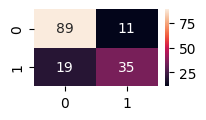

AdaBoostClassifier() Accuracy score:  0.7857142857142857

AdaBoostClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.819048  0.860000  0.839024       100
           1   0.714286  0.648148  0.679612        54

    accuracy                       0.785714       154
   macro avg   0.766667  0.754074  0.759318       154
weighted avg   0.782313  0.785714  0.783126       154



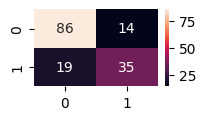

GradientBoostingClassifier() Accuracy score:  0.7987012987012987

GradientBoostingClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.810811  0.900000  0.853081       100
           1   0.767442  0.611111  0.680412        54

    accuracy                       0.798701       154
   macro avg   0.789126  0.755556  0.766746       154
weighted avg   0.795604  0.798701  0.792535       154



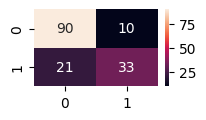

In [35]:
estimators = [
    RandomForestClassifier(random_state=3301),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    #DecisionTreeClassifier()
]

for esti in estimators:
    comp_esti(esti)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=3301)),
                             ('svc', SVC(probability=True)),
                             ('grb', GradientBoostingClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft') Accuracy score:  0.8246753246753247

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=3301)),
                             ('svc', SVC(probability=True)),
                             ('grb', GradientBoostingClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft') Classification report:
               precision    recall  f1-score   support

           0   0.841121  0.900000  0.869565       100
           1   0.787234  0.685185  0.732673        54

    accuracy                       0.824675       154
   macro avg   0.814178  0.792593  0.801119       154
weighted avg   0.822226  0.824675  0.821564       154



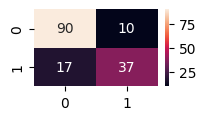

In [36]:
# Voting classifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
es1 = RandomForestClassifier(random_state=3301)
es2 = SVC(probability=True)
es3 = GradientBoostingClassifier()
es4 = LogisticRegression()

esfinal = VotingClassifier(estimators=[
    ("rfc", es1), ("svc", es2), ("grb", es3), ("lr", es4)
], voting="soft")

#voting{‘hard’, ‘soft’}, default=’hard’
#If ‘hard’, uses predicted class labels for majority rule voting. 
#Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities,
#soft is recommended for an ensemble of well-calibrated classifiers.

comp_esti(esfinal)


## Tuning Random Forest Classifier

In [37]:
# Parameters of random forest classifier
n_estimators = np.linspace(50, 300, int((300 - 50) / 20), dtype=int)
max_depth = [1, 5, 10, 50, 100, 200, 300]
min_samples_split = [2, 4, 6]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

distributions = {        # Param distributions
    "n_estimators": n_estimators,       # no of trees in the forest
    "max_depth": max_depth,             # default None, if none then nodes expand until all leaves are pure.
    "min_samples_split": min_samples_split,  # The minimum no of samples required to split the node.
    "max_features": max_features,       # The number of features to consider when looking for the best split.     
    "bootstrap": bootstrap              # Sampling technique
}

In [59]:
# Randomised search cv
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3301)
random_search_cv = RandomizedSearchCV(
    rfc,                               # estimator - Random Forest Classifier.
    param_distributions=distributions, 
    n_iter=30,                         # No of parameter settings that are sampled
    cv=5,                              # Cross validation, uses stratified kfold
    n_jobs = -1                        # Number of jobs to run in parallel.
)

search = random_search_cv.fit(X_train, Y_train)

In [65]:
cvres = search.cv_results_

for score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(score, params, rank)

0.7639077702252433 {'n_estimators': 186, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False} 1
0.7508729841396774 {'n_estimators': 186, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False} 18
0.7557510329201653 {'n_estimators': 277, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False} 9
0.7557776889244302 {'n_estimators': 118, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False} 7
0.7557377049180328 {'n_estimators': 140, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 300, 'bootstrap': True} 12
0.750859656137545 {'n_estimators': 254, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} 19
0.7476476076236173 {'n_estimators': 95, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': True} 22
0.7557110489137678 {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 50

In [105]:
rfc_finetuned = search.best_estimator_
rfc_finetuned.fit(X_train, Y_train)

best_preds = rfc_finetuned.predict(X_test)

print(classification_report(Y_test, best_preds, digits=5))

              precision    recall  f1-score   support

           0    0.83178   0.89000   0.85990       100
           1    0.76596   0.66667   0.71287        54

    accuracy                        0.81169       154
   macro avg    0.79887   0.77833   0.78639       154
weighted avg    0.80870   0.81169   0.80835       154



In [67]:
print(rfc_finetuned)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features='log2',
                       n_estimators=186, random_state=3301)


In [98]:
# Grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3, refit = True)

GC = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [106]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, Y_train)

best_pred = best_grid.predict(X_test)

print(classification_report(Y_test, best_pred, digits=5))

              precision    recall  f1-score   support

           0    0.81081   0.90000   0.85308       100
           1    0.76744   0.61111   0.68041        54

    accuracy                        0.79870       154
   macro avg    0.78913   0.75556   0.76675       154
weighted avg    0.79560   0.79870   0.79253       154

